In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

BUFFER_SIZE = 1000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
print(validation_inputs.shape, validation_targets.shape)

input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


NUM_EPOCHS = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(
    train_data,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    validation_data=(validation_inputs, validation_targets),
    verbose=1
)

test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.7M1GH9_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.7M1GH9_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
(6000, 28, 28, 1) (6000,)
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7835 - loss: 0.7520 - val_accuracy: 0.9333 - val_loss: 0.2273
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9401 - loss: 0.2052 - val_accuracy: 0.9470 - val_loss: 0.1708
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9564 - loss: 0.1495 - val_accuracy: 0.9557 - val_loss: 0.1497
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9660 - loss: 0.1164 - val_accuracy: 0.9607 - val_loss: 0.1299
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9718 - loss: 0.0974 - val_accuracy: 0.9650 - val_loss: 0.1149
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9761 - loss: 0.0810 - val_accuracy: 0.9662 - val_loss: 0.1065
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9792 - loss: 0.0691 - val_accuracy: 0.9623 - val_loss: 0.1165
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9818 - loss: 0.0607 - val_accuracy: 0.9705 - va

Mounted at /content/drive


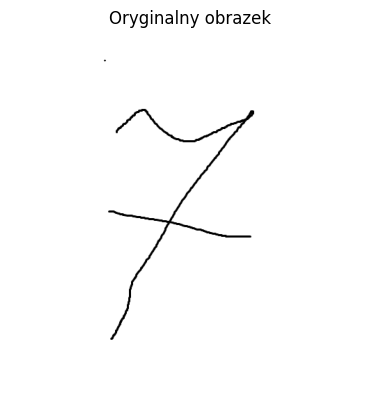

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Model rozpoznał cyfrę jako: 4


In [2]:
from google.colab import drive
drive.mount('/content/drive')
sciezka_pliku = "/content/drive/MyDrive/Colab Notebooks/liczba.png"

image = cv2.imread(sciezka_pliku, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title("Oryginalny obrazek")
plt.axis('off')
plt.show()

image_resized = cv2.resize(image, (28, 28))

image_inverted = 255 - image_resized

image_normalized = image_inverted / 255.0

input_image = image_normalized.reshape((1, 28, 28, 1)).astype(np.float32)

prediction = model.predict(input_image)
predicted_digit = np.argmax(prediction)

print(f"Model rozpoznał cyfrę jako: {predicted_digit}")